# Laporan Analisis Kompleksitas Algoritma

Dalam pengelolaan stok obat di apotek, salah satu tantangan utama adalah memastikan bahwa kuantitas obat yang tersedia dapat dengan mudah dikelola dan dipantau. Untuk mengatasi hal ini, diperlukan suatu aplikasi yang dapat mengurutkan data obat berdasarkan kuantitas dari jumlah terkecil hingga terbesar. Dengan sistem pengurutan yang efisien, apotek dapat lebih mudah menentukan stok mana yang membutuhkan pengisian ulang dan mana yang sudah mencukupi. Oleh karena itu, laporan ini berfokus pada analisis algoritma sorting untuk mendukung efisiensi pengelolaan stok obat.

### Library Yang Dibutuhkan

In [2]:
import time
import random
import matplotlib.pyplot as plt
from dataclasses import dataclass
import sys

# Set limit rekursif
sys.setrecursionlimit(200000)

# MEMBUAT DATA OBAT FARMASI UNTUK PENGAPLIKASIAN SORTING



Di sini kami menggunakan `Obat` sebagai sebuah class yang merepresentasikan data obat. Class ini memiliki tiga atribut utama:

- **`nama` (str)**: Nama dari obat.  
- **`kuantiti` (int)**: Jumlah obat yang tersedia.  
- **`jenis` (str)**: Kategori atau jenis obat, seperti antibiotik atau vitamin.  

Class ini dirancang untuk membantu dalam pengelolaan data obat, sehingga mempermudah proses pengurutan dan analisis stok.

In [3]:
@dataclass
class Obat:
    nama: str
    kuantiti: int
    jenis: str

### Data Dummy untuk Objek `Obat`

Fungsi `generate_random_obat` digunakan untuk membuat data dummy berupa daftar objek `Obat`. Data ini mencakup nama obat, kuantitas stok, dan jenis obat yang dihasilkan secara acak. Fungsi ini mempermudah simulasi pengelolaan stok obat dengan data yang bervariasi dan realistis.


In [4]:
# Function to generate random list of Obat
def generate_random_obat(size):
    # nama nama obat
    nama_obat = [
        "Paracetamol", "Ibuprofen", "Amoxicillin", "Cetirizine", "Loratadine", "Metformin", "Amlodipine", "Omeprazole", "Salbutamol", "Ciprofloxacin",
        "Azithromycin", "Lorazepam", "Furosemide", "Simvastatin", "Aspirin", "Prednisolone", "Hydrochlorothiazide", "Fluoxetine", "Ranitidine", "Insulin",
        "Doxycycline", "Clindamycin", "Gabapentin", "Lisinopril", "Tamsulosin", "Mupirocin", "Tramadol", "Baclofen", "Losartan", "Levothyroxine",
        "Sertraline", "Metoprolol", "Montelukast", "Erythromycin", "Carvedilol", "Alprazolam", "Citalopram", "Diphenhydramine", "Hydrocodone", "Clopidogrel",
        "Venlafaxine", "Mirtazapine", "Allopurinol", "Propranolol", "Warfarin", "Prednisone", "Atenolol", "Trazodone", "Quetiapine", "Zolpidem",
        "Loratadine", "Levocetirizine", "Benazepril", "Amoxicillin/Clavulanate", "Ceftriaxone", "Fexofenadine", "Ketoconazole", "Nitrofurantoin", "Cefalexin", "Chloroquine",
        "Valaciclovir", "Metoclopramide", "Atorvastatin", "Carbamazepine", "Clonazepam", "Pantoprazole", "Bupropion", "Lamotrigine", "Prazosin", "Fentanyl",
        "Duloxetine", "Gliclazide", "Ciprofloxacin/Fluconazole", "Sildenafil", "Ketorolac", "Sodium Bicarbonate", "Morphine", "Prednisolone Acetate", "Loratadine", "Dexamethasone"
    ]
    jenis_obat = [
        "Botol", "Tablet", "Sirup", "Salep", "Spray", "Scincare", "Pil", "Dewasa", "Remaja", "Anak", "Krim", "Gel"
    ]
    # diduplikasi data, agar total data yang di sort adalah (size) data, pembeda nya di jenis_obat
    nama_obat_expanded = (nama_obat * 250)[:size]
    # Membuat dummy obat
    return [
        Obat(
            nama=nama_obat_expanded[i],
            kuantiti=random.randint(5, 150),
            jenis=random.choice(jenis_obat)
        )
        for i in range(size)
    ]

# tes apakah berhasil
list_obat = generate_random_obat(5)
list_obat  # contoh

[Obat(nama='Paracetamol', kuantiti=120, jenis='Dewasa'),
 Obat(nama='Ibuprofen', kuantiti=22, jenis='Salep'),
 Obat(nama='Amoxicillin', kuantiti=48, jenis='Scincare'),
 Obat(nama='Cetirizine', kuantiti=101, jenis='Tablet'),
 Obat(nama='Loratadine', kuantiti=109, jenis='Botol')]

# ALGORITMA INSERTION SORT (iteratif dan rekursif)
##### ini adalah algoritma insertion sort untuk studi kasus mengurutkan obat berdasarkan kuantitas nya

### Algoritma Insertion Sort Iteratif

Pada fungsi `insertion_sort_iterative`, pengurutan dilakukan dengan cara iteratif menggunakan algoritma insertion sort. Fungsi ini mengurutkan daftar objek `Obat` berdasarkan atribut `kuantiti`. Karena yang dibandingkan adalah jumlah kuantitas stok obat, maka perbandingan dilakukan menggunakan `obat.kuantiti`.

#### Cara Kerja:
1. Iterasi dimulai dari elemen kedua (`i = 1`) dalam array, karena elemen pertama dianggap sudah terurut.
2. **Key** adalah elemen yang sedang dipertimbangkan untuk dimasukkan ke dalam posisi yang tepat.
3. Elemen-elemen sebelumnya dibandingkan dengan `key.kuantiti`. Jika nilai `kuantiti` lebih besar dari `key.kuantiti`, elemen tersebut akan digeser satu posisi ke kanan.
4. Setelah posisi yang tepat ditemukan, `key` ditempatkan ke posisi tersebut.

In [14]:
# Insertion Sort Iteratif
def insertion_sort_iterative(arr):
    for i in range(1, len(arr)):
        key = arr[i]
        j = i - 1
        while j >= 0 and arr[j].kuantiti > key.kuantiti:
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = key
    return arr

### Algoritma Insertion Sort Rekursif

Fungsi `insertion_sort_recursive` mengimplementasikan algoritma insertion sort menggunakan pendekatan rekursif. Pengurutan dilakukan berdasarkan atribut `kuantiti` dari objek `Obat`, sehingga elemen-elemen dalam array diurutkan dari kuantitas terkecil ke terbesar.

#### Cara Kerja:
1. Basis Rekursi:  
   - Jika panjang array (`n`) kurang dari atau sama dengan 1, array dianggap sudah terurut, sehingga fungsi langsung mengembalikan array.
   
2. Rekursi:  
   - Fungsi memanggil dirinya sendiri untuk mengurutkan elemen hingga `n-1` terlebih dahulu.

3. Penempatan Elemen Terakhir:  
   - Elemen terakhir dalam array (`last`) dibandingkan dengan elemen-elemen sebelumnya menggunakan atribut `kuantiti`. 
   - Jika elemen sebelumnya memiliki `kuantiti` lebih besar, elemen tersebut digeser satu posisi ke kanan.
   - Setelah posisi yang sesuai ditemukan, elemen `last` ditempatkan di posisi tersebut.

In [15]:
# Insertion Sort Rekursif
def insertion_sort_recursive(arr, n=None):
    if n is None:
        n = len(arr)
    if n <= 1:
        return arr
    
    # Sort terlebih dahulu n-1 elements
    insertion_sort_recursive(arr, n - 1)
    
    # Masukkan elemen terakhir pada posisi yang benar
    last = arr[n - 1]
    j = n - 2
    while j >= 0 and arr[j].kuantiti > last.kuantiti:
        arr[j + 1] = arr[j]
        j -= 1
    arr[j + 1] = last
    return arr


# Contoh Pengaplikasian Sorting pada Daftar Obat

Fungsi `generate_random_obat(520)` digunakan untuk menghasilkan daftar yang berisi 520 objek `Obat`. Data ini akan mencakup 520 macam obat dengan kuantitas stok yang acak dan jenis obat yang berbeda-beda. Daftar obat ini kemudian dapat diurutkan menggunakan algoritma sorting, baik secara iteratif maupun rekursif, untuk mengatur stok obat berdasarkan kuantitasnya.

In [7]:
# List Obat yang terdiri dari 520 macam obat
list_obat = generate_random_obat(520)  

### Menampilkan Daftar Obat Sebelum di Urutkan

Ini bertujuan untuk menunjukkan data yang sudah dihasilkan dan belum diurutkan. Hanya 20 data pertama yang ditampilkan untuk mempermudah pemantauan awal terhadap objek `Obat` yang tersedia.

In [8]:
# Print original list
print("=== Original List of Obat ===")
for obat in list_obat[:20]: # print 20 teratas saja
    print(obat)
    

=== Original List of Obat ===
Obat(nama='Paracetamol', kuantiti=147, jenis='Salep')
Obat(nama='Ibuprofen', kuantiti=17, jenis='Tablet')
Obat(nama='Amoxicillin', kuantiti=66, jenis='Krim')
Obat(nama='Cetirizine', kuantiti=97, jenis='Gel')
Obat(nama='Loratadine', kuantiti=112, jenis='Remaja')
Obat(nama='Metformin', kuantiti=133, jenis='Tablet')
Obat(nama='Amlodipine', kuantiti=64, jenis='Dewasa')
Obat(nama='Omeprazole', kuantiti=65, jenis='Dewasa')
Obat(nama='Salbutamol', kuantiti=39, jenis='Botol')
Obat(nama='Ciprofloxacin', kuantiti=99, jenis='Botol')
Obat(nama='Azithromycin', kuantiti=128, jenis='Remaja')
Obat(nama='Lorazepam', kuantiti=21, jenis='Krim')
Obat(nama='Furosemide', kuantiti=69, jenis='Scincare')
Obat(nama='Simvastatin', kuantiti=92, jenis='Spray')
Obat(nama='Aspirin', kuantiti=59, jenis='Dewasa')
Obat(nama='Prednisolone', kuantiti=73, jenis='Gel')
Obat(nama='Hydrochlorothiazide', kuantiti=136, jenis='Scincare')
Obat(nama='Fluoxetine', kuantiti=96, jenis='Krim')
Obat(nama=

### Menampilkan Daftar Obat yang Sudah Diurutkan (Iteratif)

Sekarang, kita menggunakan fungsi Iterative **Insertion Sort** untuk mengurutkan daftar obat. Hasilnya, daftar obat sudah terurut berdasarkan kuantitas stok, dan hanya 20 obat teratas yang ditampilkan untuk melihat urutan yang telah dihasilkan.


In [9]:
# Sort using iterative insertion sort
sorted_iterative = insertion_sort_iterative(list_obat.copy())
print("=== Sorted List (Iterative Insertion Sort) (20 terendah) ===")
for obat in sorted_iterative[:20]: # menampilkan 20 teratas list
    print(obat)
    

=== Sorted List (Iterative Insertion Sort) (20 terendah) ===
Obat(nama='Tramadol', kuantiti=5, jenis='Remaja')
Obat(nama='Levothyroxine', kuantiti=5, jenis='Remaja')
Obat(nama='Quetiapine', kuantiti=5, jenis='Sirup')
Obat(nama='Aspirin', kuantiti=5, jenis='Tablet')
Obat(nama='Fluoxetine', kuantiti=6, jenis='Salep')
Obat(nama='Tamsulosin', kuantiti=6, jenis='Spray')
Obat(nama='Prednisone', kuantiti=7, jenis='Dewasa')
Obat(nama='Mirtazapine', kuantiti=7, jenis='Tablet')
Obat(nama='Lisinopril', kuantiti=7, jenis='Tablet')
Obat(nama='Prazosin', kuantiti=7, jenis='Botol')
Obat(nama='Valaciclovir', kuantiti=9, jenis='Tablet')
Obat(nama='Simvastatin', kuantiti=9, jenis='Spray')
Obat(nama='Paracetamol', kuantiti=10, jenis='Remaja')
Obat(nama='Prednisolone', kuantiti=10, jenis='Scincare')
Obat(nama='Furosemide', kuantiti=10, jenis='Tablet')
Obat(nama='Omeprazole', kuantiti=10, jenis='Pil')
Obat(nama='Prazosin', kuantiti=11, jenis='Dewasa')
Obat(nama='Cefalexin', kuantiti=11, jenis='Pil')
Obat(n

### Menampilkan Daftar Obat yang Sudah Diurutkan (Rekursif)

Sekarang, kita menggunakan fungsi **Recursive Insertion Sort** untuk mengurutkan daftar obat. Hasilnya, daftar obat sudah terurut berdasarkan kuantitas stok, dan hanya 20 obat teratas yang ditampilkan untuk melihat urutan yang telah dihasilkan.


In [10]:
# Sort using recursive insertion sort
sorted_recursive = insertion_sort_recursive(list_obat.copy())
print("=== Sorted List (Recursive Insertion Sort) (20 terendah) ===")
for obat in sorted_recursive[:20]: # menampilkan 20 teratas list
    print(obat)
    

=== Sorted List (Recursive Insertion Sort) (20 terendah) ===
Obat(nama='Tramadol', kuantiti=5, jenis='Remaja')
Obat(nama='Levothyroxine', kuantiti=5, jenis='Remaja')
Obat(nama='Quetiapine', kuantiti=5, jenis='Sirup')
Obat(nama='Aspirin', kuantiti=5, jenis='Tablet')
Obat(nama='Fluoxetine', kuantiti=6, jenis='Salep')
Obat(nama='Tamsulosin', kuantiti=6, jenis='Spray')
Obat(nama='Prednisone', kuantiti=7, jenis='Dewasa')
Obat(nama='Mirtazapine', kuantiti=7, jenis='Tablet')
Obat(nama='Lisinopril', kuantiti=7, jenis='Tablet')
Obat(nama='Prazosin', kuantiti=7, jenis='Botol')
Obat(nama='Valaciclovir', kuantiti=9, jenis='Tablet')
Obat(nama='Simvastatin', kuantiti=9, jenis='Spray')
Obat(nama='Paracetamol', kuantiti=10, jenis='Remaja')
Obat(nama='Prednisolone', kuantiti=10, jenis='Scincare')
Obat(nama='Furosemide', kuantiti=10, jenis='Tablet')
Obat(nama='Omeprazole', kuantiti=10, jenis='Pil')
Obat(nama='Prazosin', kuantiti=11, jenis='Dewasa')
Obat(nama='Cefalexin', kuantiti=11, jenis='Pil')
Obat(n

# Analisis efisiensi dari algoritma

### Analisis Perbandingan Kinerja Insertion Sort Rekursif dan Iteratif

Pada bagian ini, kami membandingkan kinerja dua versi dari algoritma **Insertion Sort**: versi **rekursif** dan **iteratif**. Pengujian dilakukan dengan berbagai ukuran input yang berisi daftar obat yang dihasilkan secara acak. Waktu eksekusi untuk masing-masing algoritma diukur dan dibandingkan.



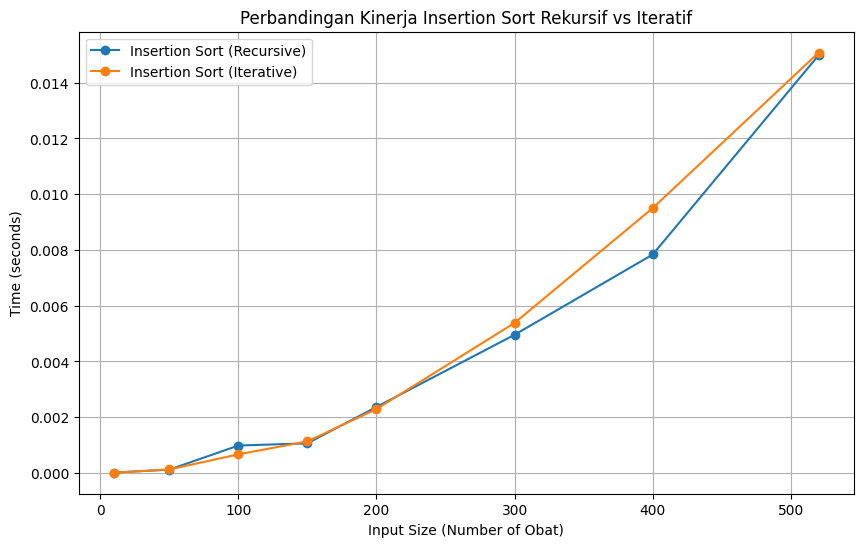

In [22]:
# Fungsi untuk analisis algoritma pengurutan
sizes = [10, 50, 100, 150, 200, 300, 400, 520]
recursive_times = []
iterative_times = []
list_obat = generate_random_obat(520)  

for size in sizes:
    arr = list_obat[:size]

    # Measure recursive insertion sort
    start_time = time.time()
    insertion_sort_recursive(arr.copy())
    recursive_times.append(time.time() - start_time)

    # Measure iterative insertion sort
    start_time = time.time()
    insertion_sort_iterative(arr.copy())
    iterative_times.append(time.time() - start_time)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(sizes, recursive_times, label='Insertion Sort (Recursive)', marker='o')
plt.plot(sizes, iterative_times, label='Insertion Sort (Iterative)', marker='o')
plt.xlabel('Input Size (Number of Obat)')
plt.ylabel('Time (seconds)')
plt.title('Perbandingan Kinerja Insertion Sort Rekursif vs Iteratif')
plt.legend()
plt.grid(True)
plt.show()

### Analisis Perbandingan Waktu Eksekusi Insertion Sort Rekursif dan Iteratif

Pada pengujian awal dengan 520 data obat, waktu eksekusi kedua algoritma (rekursif dan iteratif) hampir tidak menunjukkan perbedaan yang signifikan. Namun, ketika jumlah data ditingkatkan menjadi 15.000, perbedaan kinerja antara keduanya mulai terlihat lebih jelas. Insertion Sort Iteratif menunjukkan peningkatan waktu eksekusi yang lebih signifikan dibandingkan dengan Insertion Sort Rekursif, dengan grafik iteratif semakin naik lebih tinggi seiring bertambahnya ukuran input.

Meskipun kedua algoritma memiliki kompleksitas **O(n²)**, Insertion Sort Iteratif membutuhkan waktu yang lebih lama pada dataset besar. Hal ini mungkin disebabkan oleh overhead dalam manipulasi elemen array langsung, yang lebih intensif pada iteratif, sementara Insertion Sort Rekursif cenderung lebih efisien dalam pengelolaan tumpukan rekursi dan pemanggilan fungsi.

Secara keseluruhan, meskipun kedua algoritma memberikan hasil pengurutan yang identik, Insertion Sort Rekursif lebih disarankan untuk dataset besar karena memberikan waktu eksekusi yang lebih cepat dan lebih efisien dalam hal performa.


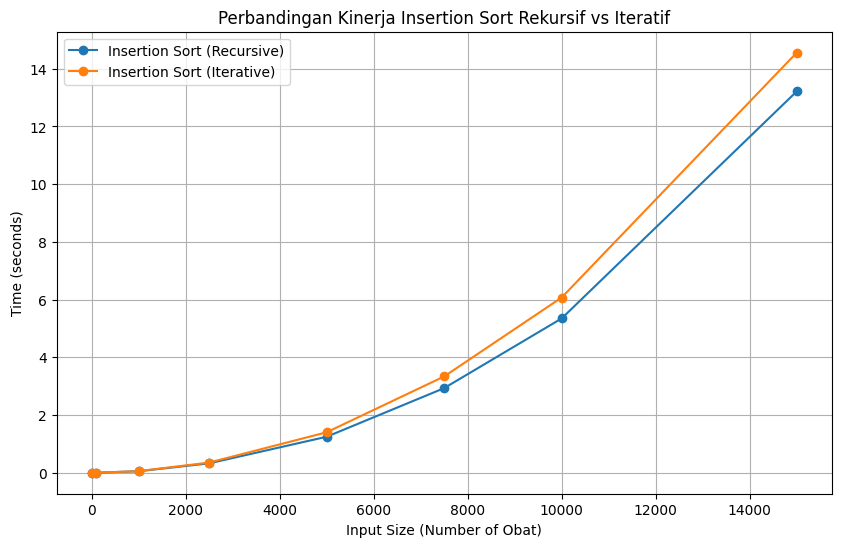

In [12]:
# Fungsi untuk analisis algoritma pengurutan
sizes = [10, 100, 1000, 2500, 5000,7500, 10000,15000]
recursive_times = []
iterative_times = []
list_obat = generate_random_obat(15000)  

for size in sizes:
    arr = list_obat[:size]

    # Measure recursive insertion sort
    start_time = time.time()
    insertion_sort_recursive(arr.copy())
    recursive_times.append(time.time() - start_time)

    # Measure iterative insertion sort
    start_time = time.time()
    insertion_sort_iterative(arr.copy())
    iterative_times.append(time.time() - start_time)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(sizes, recursive_times, label='Insertion Sort (Recursive)', marker='o')
plt.plot(sizes, iterative_times, label='Insertion Sort (Iterative)', marker='o')
plt.xlabel('Input Size (Number of Obat)')
plt.ylabel('Time (seconds)')
plt.title('Perbandingan Kinerja Insertion Sort Rekursif vs Iteratif')
plt.legend()
plt.grid(True)
plt.show()

### Kesimpulan

Berdasarkan analisis perbandingan waktu eksekusi antara **Insertion Sort Rekursif** dan **Insertion Sort Iteratif** dalam mengurutkan data stok obat, meskipun keduanya memiliki kompleksitas waktu yang sama, yaitu **O(n²)**, terdapat perbedaan performa yang signifikan pada dataset besar. Pada pengelolaan stok obat dengan jumlah data kecil (520 data obat), kedua algoritma menunjukkan waktu eksekusi yang hampir serupa. Namun, ketika jumlah data meningkat hingga 15.000 obat, **Insertion Sort Iteratif** membutuhkan waktu eksekusi yang lebih lama dibandingkan **Insertion Sort Rekursif**.

Perbedaan ini disebabkan oleh overhead yang lebih tinggi pada **Insertion Sort Iteratif** dalam manipulasi elemen array, sedangkan **Insertion Sort Rekursif** lebih efisien dalam hal pengelolaan memori dan eksekusi waktu untuk dataset besar. Oleh karena itu, dalam pengelolaan stok obat yang melibatkan jumlah data lebih banyak, menggunakan **Insertion Sort Rekursif** untuk mengurutkan stok obat akan lebih efisien dibandingkan dengan metode iteratif. Namun, untuk jumlah data yang lebih kecil, kedua algoritma memberikan hasil yang hampir setara dalam waktu eksekusi.
